In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
raw_data = pd.read_csv('epi_r.csv')

In [2]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [3]:
raw_data.tail()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,Baked Ham with Marmalade-Horseradish Glaze,4.375,560.0,73.0,10.0,3698.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

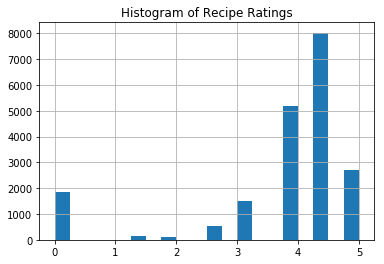

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
from sklearn.svm import SVR
#svr = SVR()
#X = raw_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
#Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
#svr.fit(X,Y)

In [7]:
#plt.scatter(Y, svr.predict(X))

In [8]:
#svr.score(X, Y)

In [9]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(svr, X, Y, cv=5)

In [10]:
#raw_data=raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
#raw_data['sums'] = raw_data.sum(axis=0)

In [11]:
#raw_data = raw_data.loc[:, raw_data.sum(axis=0) > 200]
#raw_data.sum(axis=0)
#raw_data.shape

In [12]:
raw_data['highRating'] = raw_data['rating'] >= 3.5
Y = raw_data['highRating']
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'highRating'], 1)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X)
X_pca = pca.transform(X)

In [14]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_pca,Y)
svc.score(X_pca, Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8013664472371833

In [15]:
# Cross validation with PCA 
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_pca, Y, cv = 5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

array([0.79905261, 0.80104712, 0.80249377, 0.80149626, 0.80124688])

In [16]:
raw_data['highRating'] = pd.concat([pd.get_dummies(raw_data.highRating, prefix = "highRating", drop_first=True)], axis=1)
num_cols = raw_data.select_dtypes(include = ['int', 'float'])
correlated = num_cols.corr().abs()
correlated.sort_values(by = 'rating', ascending = False).head(35)

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,1.000000,0.007882,0.013980,0.007236,0.008177,0.003147,0.006771,0.011155,0.047840,0.006717,...,0.003016,0.023807,0.006771,0.007179,0.002294,0.009179,0.051770,0.037606,0.006739,0.022599
drink,0.241388,0.003951,0.005884,0.003820,0.004246,0.004142,0.001691,0.006974,0.008791,0.004474,...,0.008459,0.017362,0.001691,0.004142,0.029405,0.002929,0.004474,0.003054,0.007373,0.036521
alcoholic,0.224767,0.003423,0.005146,0.003324,0.003667,0.003606,0.001472,0.006072,0.007654,0.003895,...,0.007365,0.032720,0.001472,0.003606,0.025602,0.002550,0.003895,0.007795,0.006420,0.031798
house & garden,0.217911,0.002487,0.003424,0.002359,0.002613,0.002648,0.001081,0.004458,0.005620,0.002860,...,0.005408,0.023088,0.001081,0.002648,0.013287,0.001872,0.002860,0.005723,0.004714,0.016915
gin,0.191400,0.001805,0.002655,0.001726,0.001971,0.001847,0.000754,0.003110,0.003920,0.001995,...,0.003772,0.017558,0.000754,0.001847,0.013113,0.001306,0.001995,0.003992,0.003288,0.016287
spirit,0.146625,0.001730,0.002576,0.001649,0.001800,0.001818,0.000742,0.003061,0.003859,0.001964,...,0.003713,0.017281,0.000742,0.001818,0.012906,0.001285,0.001964,0.003929,0.003236,0.016030
cocktail,0.140723,0.002278,0.003415,0.002194,0.002443,0.002405,0.000982,0.004049,0.005103,0.002597,...,0.004911,0.020572,0.000982,0.002405,0.017071,0.001700,0.002597,0.005197,0.004280,0.021201
cocktail party,0.140482,0.004116,0.005995,0.003925,0.004314,0.004275,0.001745,0.007198,0.009074,0.004618,...,0.008731,0.012553,0.001745,0.004275,0.021502,0.003023,0.004618,0.009241,0.007610,0.034823
bitters,0.137368,0.001281,0.001909,0.001173,0.001397,0.001381,0.000564,0.002326,0.002932,0.001492,...,0.002821,0.013129,0.000564,0.001381,0.009806,0.000977,0.001492,0.002985,0.002459,0.012179
bon appétit,0.124549,0.008150,0.012206,0.007551,0.008330,0.016179,0.006604,0.027241,0.034339,0.017476,...,0.010378,0.008533,0.007552,0.016179,0.000023,0.011439,0.014632,0.016231,0.009306,0.009562


In [20]:
X = raw_data[['drink', 'alcoholic', 'house & garden', 'gin', 'spirit', 'cocktail',
              'cocktail party', 'bitters', 'bon appétit', 'harpercollins', 'peanut free',
              'soy free', 'liqueur', 'rum', 'tree nut free', 'non-alcoholic', 'bake', 'condiment',
              'roast', 'fall', 'sauté', 'brandy', 'fortified wine', 'pernod', 'créme de cacao',
              'dinner', 'weelicious', 'chartreuse', 'kosher', 'lime juice']]
Y= raw_data.highRating

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,Y)
svc.score(X, Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8058049072411729

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv = 5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

array([0.80279232, 0.80329095, 0.80473815, 0.8074813 , 0.80598504])